4\. Assignment: Create a customer segmentation
----------------------------------------------------

### Objective

The goal of this assignment is to segment a credit card customer base into different groups for marketing and customer management purposes.

### Dataset

Use the following dataset available on Kaggle:
1. Title – Customer Credit Card Data
2. Author  - n.a., Fatemeh Habibimoghaddam (Owner)
3. Source – https://www.kaggle.com/datasets/fhabibimoghaddam/customer-credit-card-data   
(alternatively, can be found in `DSIF-course-material/python-material/data/1-raw/dsif8-assignment`)
3. License – Attribution 4.0 International (CC BY 4.0)

### Instructions
-   **Load and Explore the Data:** Start by loading the data and performing basic exploratory data analysis (EDA).
-   **Data Preprocessing:** Handle missing values, standardize the data, and prepare it for clustering.
-   **Clustering:** Apply clustering techniques like K-Means or Hierarchical Clustering to segment the customers. Optionally, use PCA to reduce dimensionality before clustering.
-   **Segmentation and interpretation:** Create meaningful and valid customer segments (at least 2, pick the number that works best for you based on your analysis) that can be leveraged for targeted marketing, customer management, and strategic decision-making.

### Submission
Submit your Python code and a brief analysis using Markdown comments summarizing your findings and insights.

---


### 1. Loading datasets

#### Import libraries

In [5]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Check if in Google Colab environment
try:
    from google.colab import drive
    # Mount drive
    drive.mount('/content/drive')
    # Set up path to Python material parent folder
    path_python_material = rf"drive/MyDrive/{python_material_folder_name}"
        # If unsure, print current directory path by executing the following in a new cell:
        # !pwd
    IN_COLAB = True
except:
    IN_COLAB = False
    # If working locally on Jupyter Notebook, parent folder is one folder up (assuming you are using the folder structure shared at the beginning of the course)
    path_python_material = "/Users/hisay/Desktop/Courses/DSFinance/Data_Science_in_Finance_Resources/DSF_Assignment/"

In [7]:
# Read data that was exported from previous session
df = pd.read_csv(f"{path_python_material}dsif8-assignment/Customer_Data.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONE_OFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 2. Data preprocessing and exploratory data analysis 

In [9]:
#list all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONE_OFF_PURCHASES                 8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONE_OFF_PURCHASES_FREQUENCY       8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

| Id  | Features                               | Description |
|-----|----------------------------------------|-------------|
| 1   | Cust_Id                                | Identification of credit card holder |
| 2   | Balance                                | A credit card balance or Total amount left in their account to make purchases |
| 3   | Balance_Frequency                      | How frequently the balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) |
| 4   | Purchases                              | Total amount of purchases made from account |
| 5   | One_Off_Purchases                      | Maximum purchase amount done in one-go |
| 6   | Installments_Purchases                 | Amount of purchase done in installment |
| 7   | Cash_Advance                           | Cash in advance given by the user |
| 8   | Purchases_Frequency                    | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| 9   | One_Off_Purchases_Frequency            | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) |
| 10  | Purchases_Installments_Frequency       | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) |
| 11  | Cash_Advance_Frequency                 | How frequently the cash in advance being paid |
| 12  | Cash_Advance_Trx                       | Number of Transactions made with "Cash in Advance" |
| 13  | Purchases_Trx                          | Number of purchase transactions made |
| 14  | Credit_Limit                           | Limit of Credit Card for user |
| 15  | Payments                               | Total amount of payments done by user |
| 16  | Minimum_Payments                       | Minimum amount of payments made by user |
| 17  | Prc_Full_Payment                       | Percentage of full payment paid by user |
| 18  | Tenure                                 | Tenure of credit card service for user |


In [49]:
#Sumarrazie all the nan in the from the dataframe
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONE_OFF_PURCHASES                     0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONE_OFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [50]:
#Dropping the null values or the empty cells
df1 = df
df1.dropna (inplace = True)
df1.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONE_OFF_PURCHASES                   0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONE_OFF_PURCHASES_FREQUENCY         0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**We draw the heatmap to see how different feautres from the customer data are related**

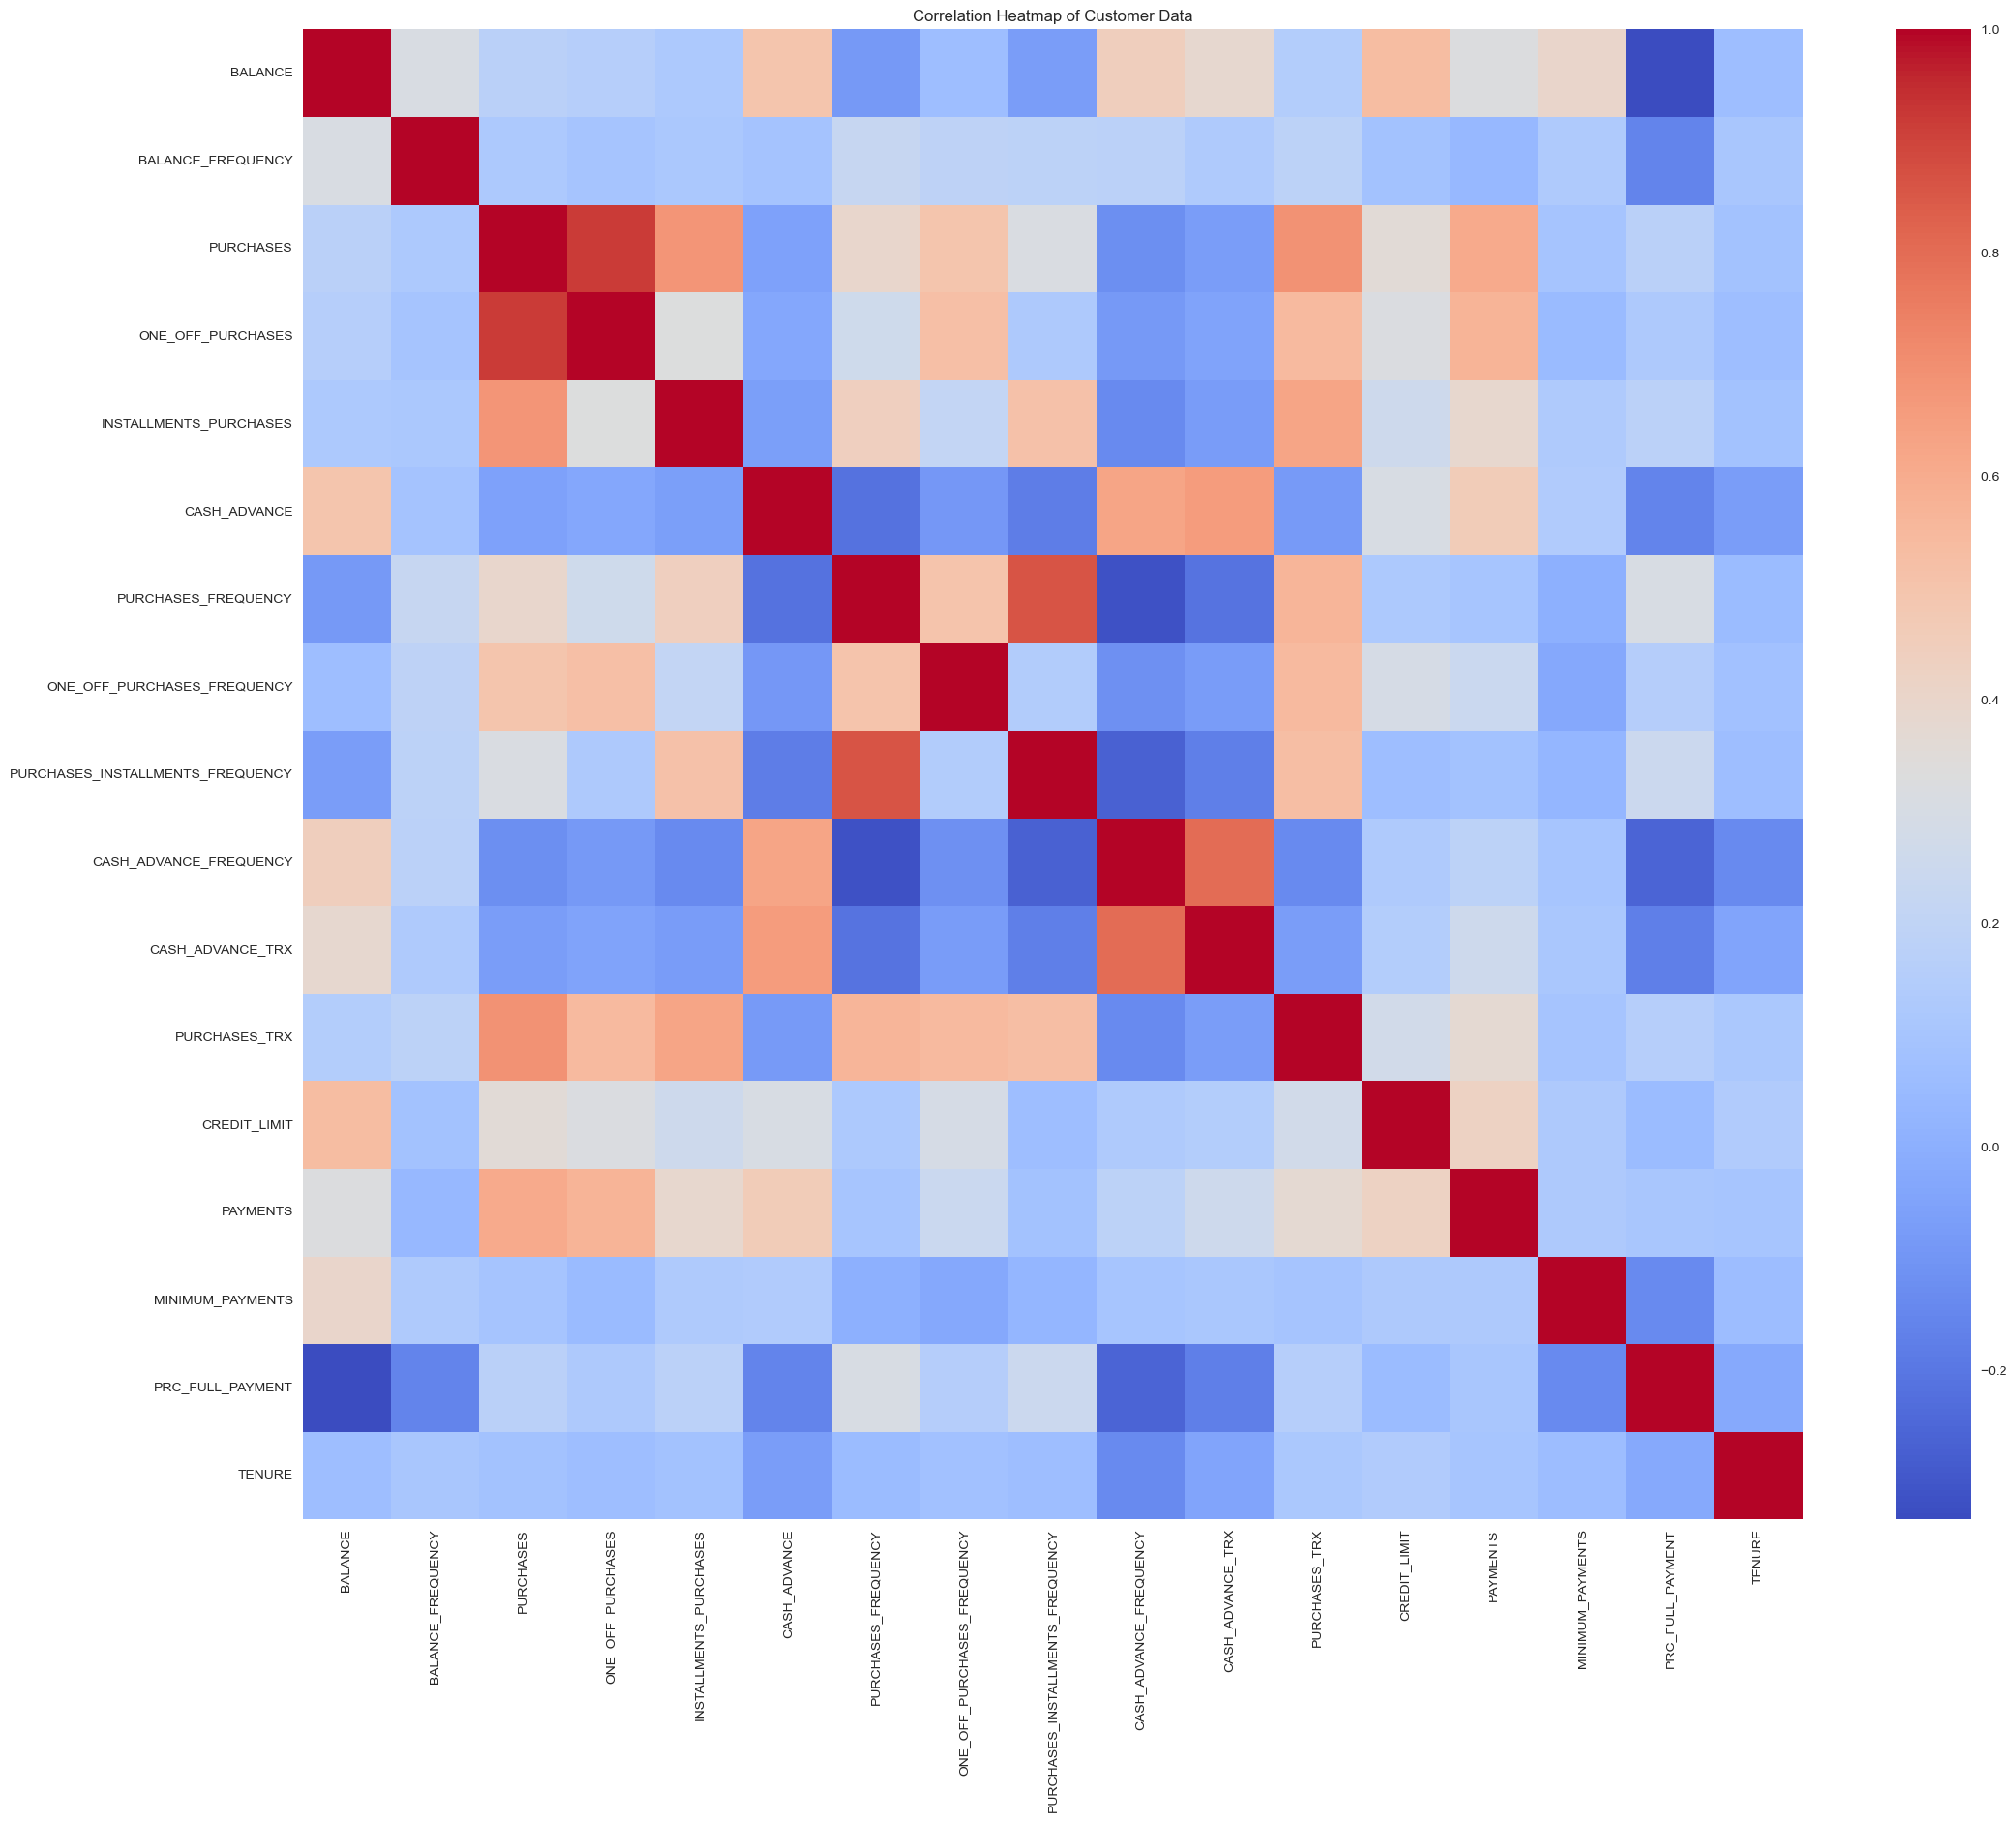

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df1.select_dtypes(include=['number']) #Select only numeric data
corr_matrix = df_numeric.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Customer Data")
plt.show()

**Based on the heatmap, I listed the highly correlated features, they are as follows:**

1. PURCHASES_TRX
2. CREDIT_LIMIT
3. PAYMENTS
4. PURCHASES_FREQUENCY
5. BALANCE
6. INSTALLMENTS_PURCHASES
7. ONE_OFF_PURCHASES
8. PURCHASES
9. CASH_ADVANCE
10. CASH_ADVANCE_FREQUENCY
11. PURCHASES_INSTALLMENTS_FREQUENCY

In [169]:
feautres = ['PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE', 'BALANCE', 
            'INSTALLMENTS_PURCHASES', 'ONE_OFF_PURCHASES', 'PURCHASES', 
            'PURCHASES_INSTALLMENTS_FREQUENCY']
df_new = df1[feautres]
df_new.head()

,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PURCHASES_FREQUENCY,CASH_ADVANCE,BALANCE,INSTALLMENTS_PURCHASES,ONE_OFF_PURCHASES,PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY
0,2,1000.0,201.802084,0.166667,0.000000,40.900749,95.40,0.00,95.40,0.083333
1,0,7000.0,4103.032597,0.000000,6442.945483,3202.467416,0.00,0.00,0.00,0.000000
2,12,7500.0,622.066742,1.000000,0.000000,2495.148862,0.00,773.17,773.17,0.000000
4,1,1200.0,678.334763,0.083333,0.000000,817.714335,0.00,16.00,16.00,0.000000
5,8,1800.0,1400.057770,0.666667,0.000000,1809.828751,1333.28,0.00,1333.28,0.583333


**Data Imputation**

In [171]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Other strategies: median, most_frequent
df_imputed = pd.DataFrame(imputer.fit_transform(df_new), columns=df_new.columns)
df_imputed.head()

,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PURCHASES_FREQUENCY,CASH_ADVANCE,BALANCE,INSTALLMENTS_PURCHASES,ONE_OFF_PURCHASES,PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY
0,2.0,1000.0,201.802084,0.166667,0.000000,40.900749,95.40,0.00,95.40,0.083333
1,0.0,7000.0,4103.032597,0.000000,6442.945483,3202.467416,0.00,0.00,0.00,0.000000
2,12.0,7500.0,622.066742,1.000000,0.000000,2495.148862,0.00,773.17,773.17,0.000000
3,1.0,1200.0,678.334763,0.083333,0.000000,817.714335,0.00,16.00,16.00,0.000000
4,8.0,1800.0,1400.057770,0.666667,0.000000,1809.828751,1333.28,0.00,1333.28,0.583333


**Display the distribution of the each of above listed feautres**

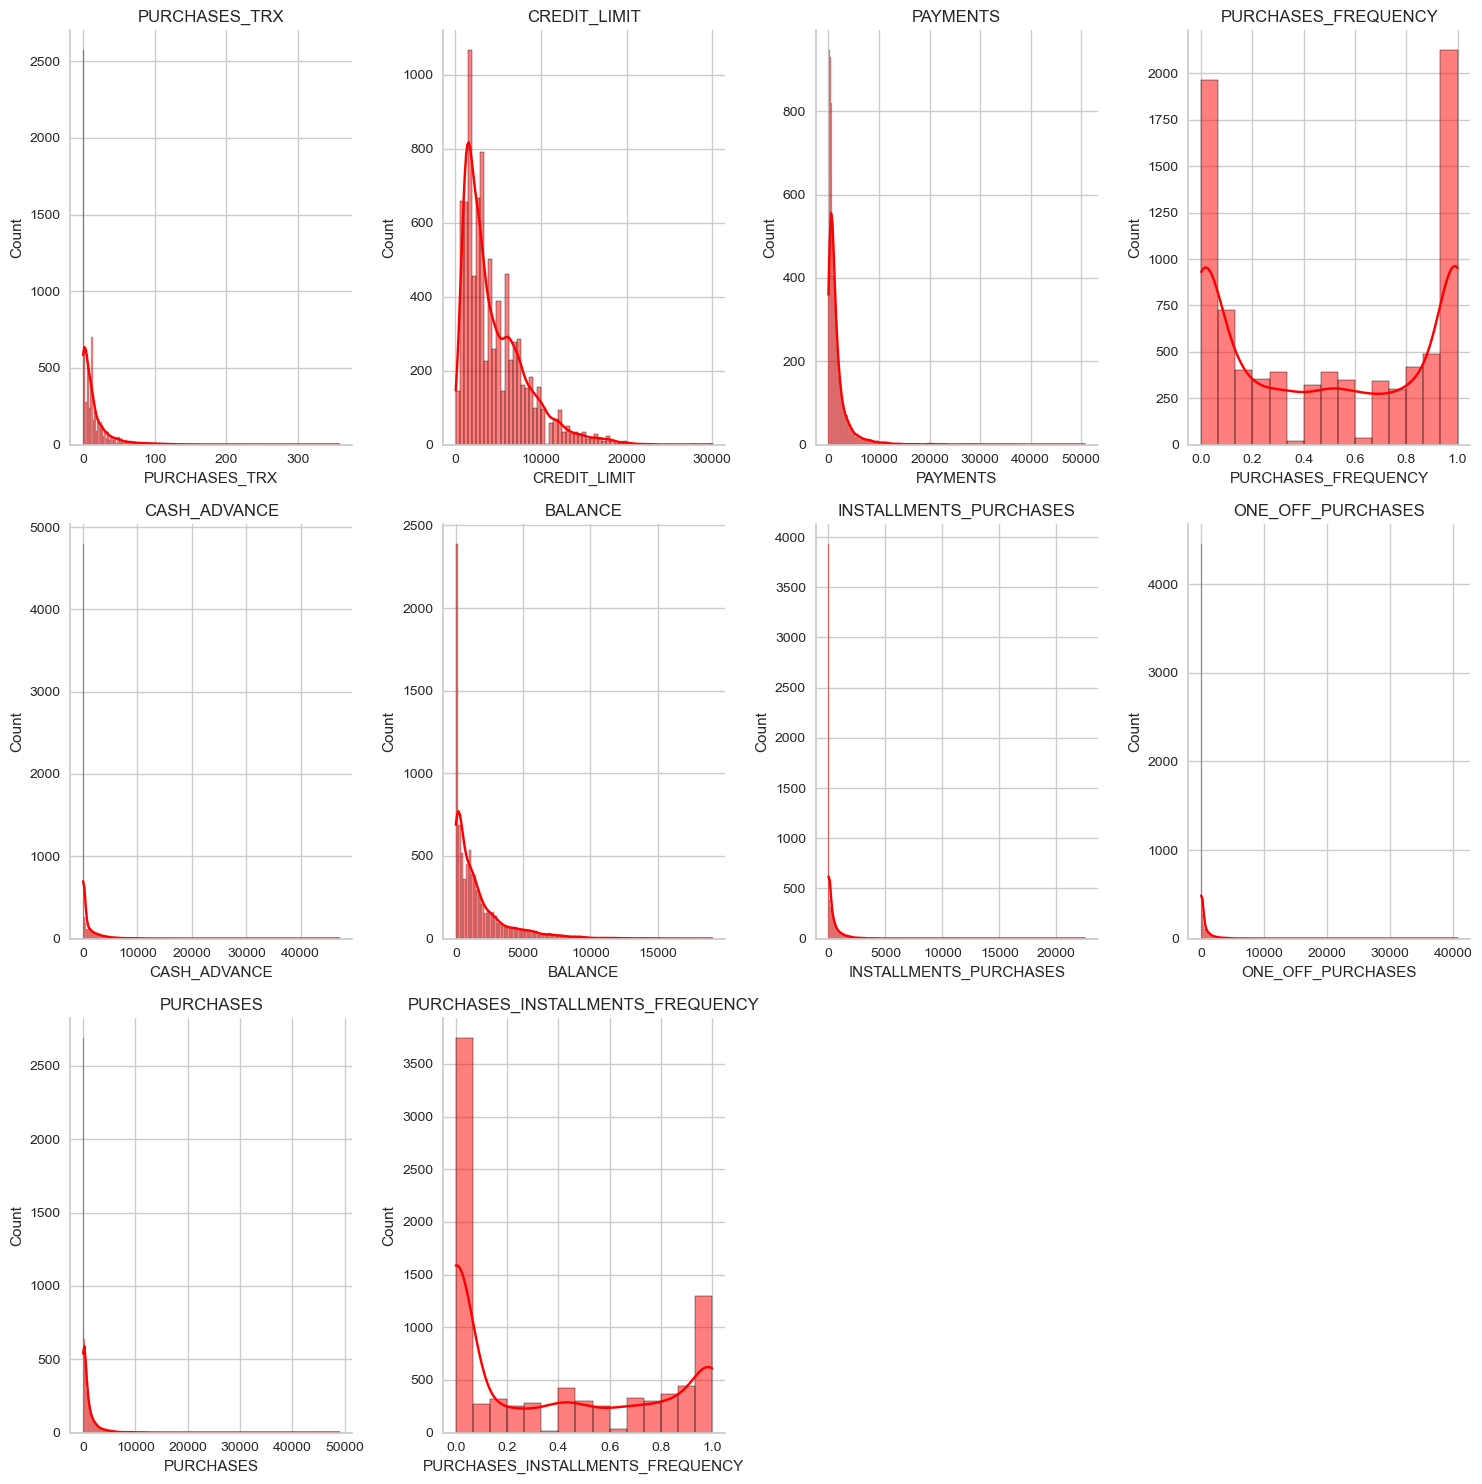

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define number of rows and columns
num_rows, num_cols = 3, 4
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

# Flatten the axs array
axs = axs.flatten()
num_features = len(df_new.columns)

# Plot each feature in a separate subplot
for idx in range(min(num_features, num_rows * num_cols)):  # Ensure we don't exceed available columns
    column = df_new.columns[idx]
    sns.histplot(df_new[column], color="RED", kde=True, ax=axs[idx])
    axs[idx].set_title(column)  # Uncommented title for better visualization
    sns.despine()

# Hide any unused subplots if df_new has fewer columns than 3x4 = 12
for idx in range(num_features, num_rows * num_cols):
    fig.delaxes(axs[idx])  # Remove extra subplots to avoid blank spaces

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**Standardization**

In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)
df_scaled = pd.DataFrame(df_scaled, columns=df_imputed.columns)# Convert scaled data back to a DataFrame
# Now you can use the head() method
df_scaled.head()

,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PURCHASES_FREQUENCY,CASH_ADVANCE,BALANCE,INSTALLMENTS_PURCHASES,ONE_OFF_PURCHASES,PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY
0,-0.517623,-0.962575,-0.543942,-0.820769,-0.468655,-0.744625,-0.354826,-0.359160,-0.429184,-0.717179
1,-0.597054,0.677204,0.796852,-1.236139,2.568556,0.764152,-0.458839,-0.359160,-0.473208,-0.926522
2,-0.120467,0.813852,-0.399503,1.256077,-0.468655,0.426602,-0.458839,0.099909,-0.116413,-0.926522
3,-0.557339,-0.907916,-0.380165,-1.028455,-0.468655,-0.373910,-0.458839,-0.349660,-0.465825,-0.926522
4,-0.279329,-0.743938,-0.132119,0.425339,-0.468655,0.099551,0.994815,-0.359160,0.142062,0.538882


In [195]:
#Display the summary of the scaled dataframe
df_scaled.describe()

,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PURCHASES_FREQUENCY,CASH_ADVANCE,BALANCE,INSTALLMENTS_PURCHASES,ONE_OFF_PURCHASES,PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY
count,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8636.000000,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03
mean,-1.151876e-17,1.118965e-16,-2.632859e-17,6.582147e-18,-4.278395e-17,0.000000,-2.797412e-17,-3.291073e-17,1.151876e-17,8.227683e-18
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-5.970542e-01,-1.222207e+00,-6.132812e-01,-1.236139e+00,-4.686555e-01,-0.764144,-4.588390e-01,-3.591603e-01,-4.732082e-01,-9.265216e-01
25%,-5.573385e-01,-7.985975e-01,-4.694457e-01,-1.028455e+00,-4.686555e-01,-0.693469,-4.588390e-01,-3.591603e-01,-4.531953e-01,-9.265216e-01
50%,-3.190448e-01,-4.159823e-01,-3.051243e-01,9.968862e-03,-4.686555e-01,-0.326598,-3.554965e-01,-3.324445e-01,-2.999696e-01,-5.078338e-01
75%,1.178270e-01,5.405558e-01,5.727990e-02,1.048393e+00,6.515234e-02,0.240507,6.901931e-02,-3.444604e-03,5.562856e-02,9.575697e-01
max,1.362114e+01,6.963026e+00,1.681891e+01,1.256077e+00,2.175188e+01,8.323708,2.407255e+01,2.384284e+01,2.215714e+01,1.585600e+00


In [199]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PURCHASES_TRX                     8636 non-null   float64
 1   CREDIT_LIMIT                      8636 non-null   float64
 2   PAYMENTS                          8636 non-null   float64
 3   PURCHASES_FREQUENCY               8636 non-null   float64
 4   CASH_ADVANCE                      8636 non-null   float64
 5   BALANCE                           8636 non-null   float64
 6   INSTALLMENTS_PURCHASES            8636 non-null   float64
 7   ONE_OFF_PURCHASES                 8636 non-null   float64
 8   PURCHASES                         8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
dtypes: float64(10)
memory usage: 674.8 KB


**PCA: Dimensionality reduction**

In [202]:
from sklearn.decomposition import PCA
# Initialize PCA with the number of components you want to keep
pca = PCA(n_components=2, random_state = 24)  # Reduce to 2 dimensions, often used for visualization
df_pca = pd.DataFrame(pca.fit_transform(df_scaled)
                      , columns = ["pc1", "pc2"])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio by component:", explained_variance)

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:", cumulative_variance)

Explained variance ratio by component: [0.41175078 0.22982205]
Cumulative explained variance: [0.41175078 0.64157283]


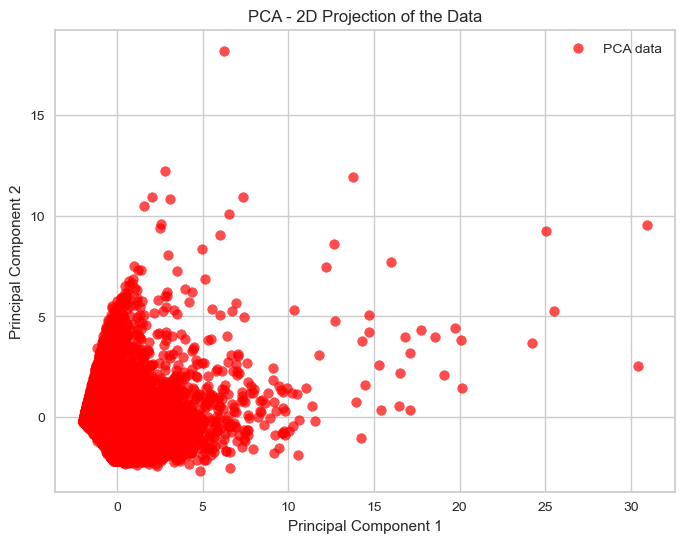

In [204]:
# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["pc1"], df_pca["pc2"], color = "red", marker = "o", 
            alpha=0.7,label="PCA data")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA - 2D Projection of the Data')
plt.show()

### 3.  Outlier detection from the entire dataset

**1. Z-score**

In [207]:
from scipy import stats
z_scores = np.abs(stats.zscore(df_scaled))# Z-scores for the entire dataset
outliers = (z_scores > 3)# Flag outliers (Z-score > 3) for all columns
outliers_count = np.sum(outliers, axis = 0)# Count the total number of outliers across the entire dataset
print(f"Outliers detected using Z-scores: {outliers_count}")

Outliers detected using Z-scores: PURCHASES_TRX                       180
CREDIT_LIMIT                        149
PAYMENTS                            154
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                        177
BALANCE                             186
INSTALLMENTS_PURCHASES              130
ONE_OFF_PURCHASES                   121
PURCHASES                           129
PURCHASES_INSTALLMENTS_FREQUENCY      0
dtype: int64


### Outlier detection from the principal components

**1. Z-score**

### Column: pc1 ###
Outliers detected using z-scores: 136
### Column: pc2 ###
Outliers detected using z-scores: 118


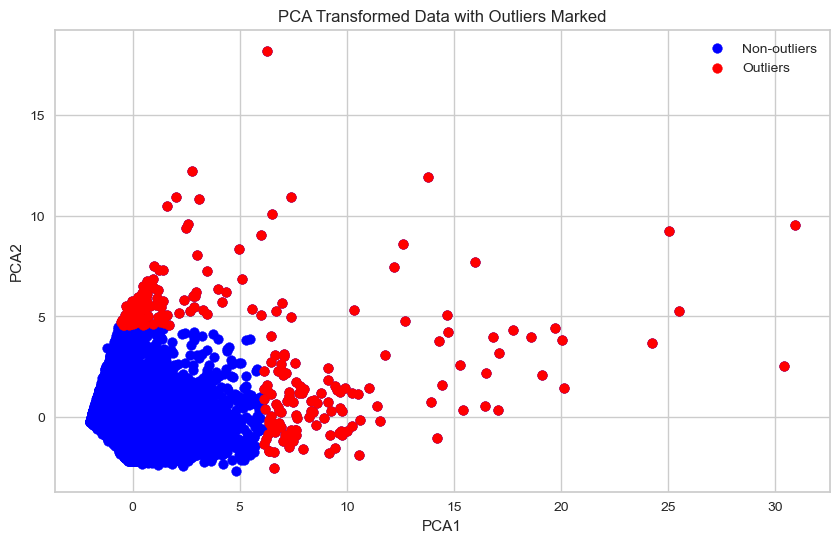

In [210]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming df_pca is your PCA-transformed dataframe containing columns 'pc1' and 'pc2'
outlier_indices = []

# Calculate the Z-scores and flag outliers for each column (pc1, pc2)
for col in ["pc1", "pc2"]:
    print(f"### Column: {col} ###")
    
    # Calculate Z-scores for the column
    df_pca[f"{col}_zscore"] = np.abs(stats.zscore(df_pca[f"{col}"]))
    
    # Flag outliers (Z-score > 3)
    outliers = df_pca[df_pca[f"{col}_zscore"] > 3]
    outlier_indices.extend(outliers.index)
    print(f"Outliers detected using z-scores: {len(outliers)}")

# Remove duplicates from outlier indices
outlier_indices = list(set(outlier_indices))

# Plotting PCA data with outliers and non outliers marked
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['pc1'], df_pca['pc2'], color='blue', label='Non-outliers')
plt.scatter(df_pca.loc[outlier_indices, 'pc1'], df_pca.loc[outlier_indices, 'pc2'], color='red', label='Outliers')
plt.title('PCA Transformed Data with Outliers Marked')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

### 4. Clustering

**4.1 Clustering using K-Means**

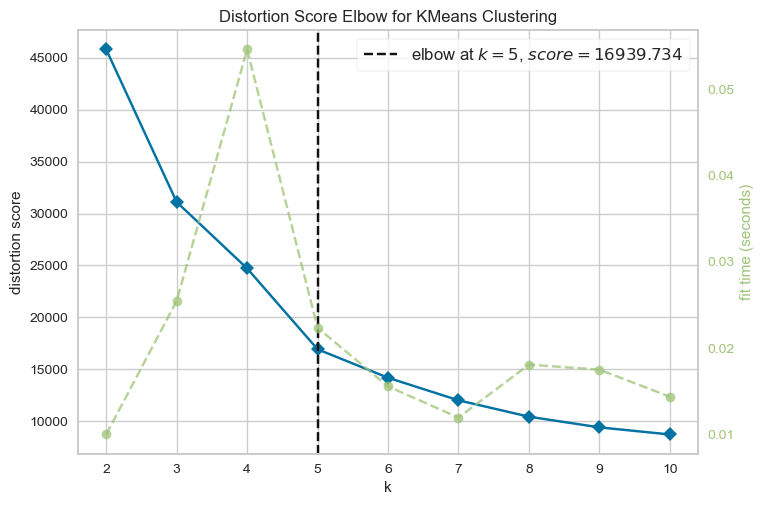

The optimal number of clusters:  5


In [213]:
#Find the optimal number of clusters using the ELbow method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
data_for_clustering = df_pca

# Initialize the KElbowVisualizer with the KMeans estimator and a range of K (#of cluster) values
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_for_clustering)# Fit the visualizer to the PCA-transformed data
Elbow_M.show()# Display the Elbow Method plot


# Print the optimal number of clusters based on the visualizer
print("The optimal number of clusters: ", Elbow_M.elbow_value_)

**Display all the clusters**

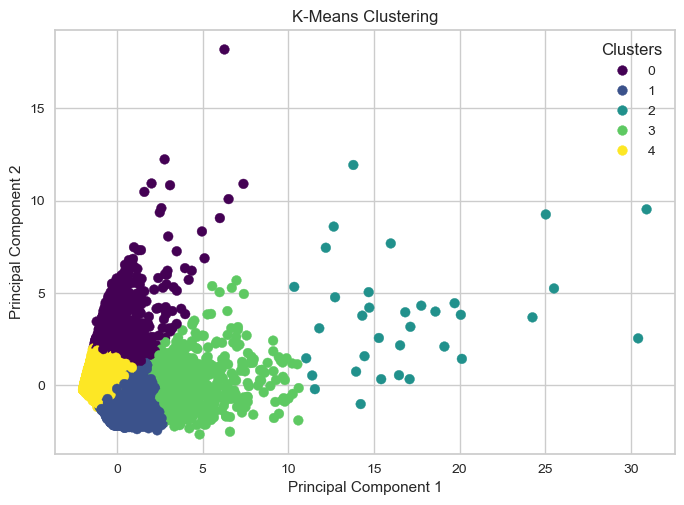

In [215]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Taking only the principla components of the datframe
data_for_clustering = df_pca
# Applying K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
df_pca['cluster-km'] = kmeans.fit_predict(df_pca)
df_pca.head()

# Visualize the clusters
scatter = plt.scatter(df_pca['pc1'], df_pca['pc2'], c=df_pca['cluster-km'], cmap='viridis')

# Adding a legend with custom labels
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Clusters", loc="upper right")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.show()

From the above figure its apparent that the ouliers are from the cluster # 0 and 3

**4.2 Clustering using Hierarchial structures**

Now you can use 'linked' to plot a dendrogram or analyze the hierarchical clustering

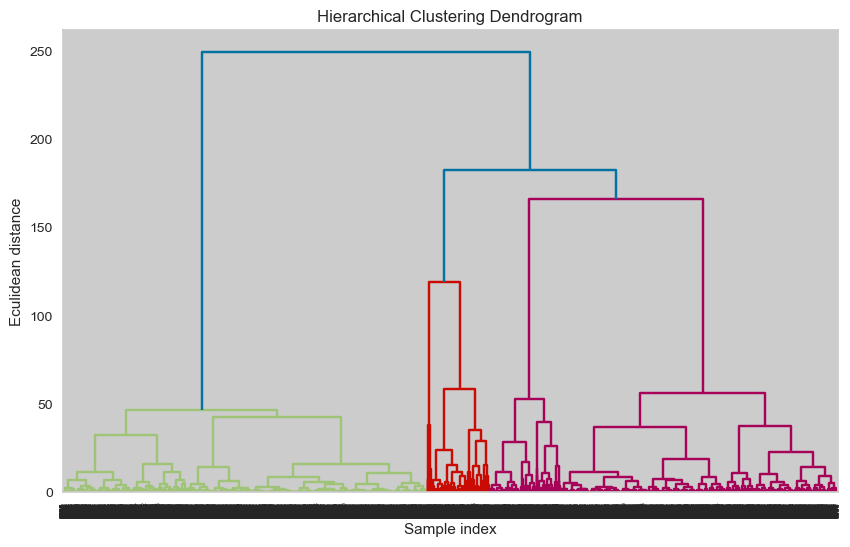

In [217]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
linked = linkage(data_for_clustering, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Eculidean distance')
plt.show()

Based on the euclidean distance in the dendrogram above, it can be concluded that the cluster number will be four since the tallest vertical line/largest distance is on the first line/branch (at the left of image) and the threshold 120 cuts the dendrogram into four parts. 

**5. Clustering Model Evaluation**

In [240]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Assuming df_pca is your PCA-transformed data and 'data_for_clustering' is your feature data
data_for_clustering = df_pca[['pc1', 'pc2']]  # Replace with your PCA columns if necessary

# --- K-Means Clustering ---
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(data_for_clustering)

# --- Hierarchical Clustering ---
agg = AgglomerativeClustering(n_clusters=5)
agg_labels = agg.fit_predict(data_for_clustering)

# --- Evaluation Metrics for K-Means ---
db_kmeans = davies_bouldin_score(data_for_clustering, kmeans_labels)
ss_kmeans = silhouette_score(data_for_clustering, kmeans_labels)
ch_kmeans = calinski_harabasz_score(data_for_clustering, kmeans_labels)

# --- Evaluation Metrics for Hierarchical Clustering ---
db_agg = davies_bouldin_score(data_for_clustering, agg_labels)
ss_agg = silhouette_score(data_for_clustering, agg_labels)
ch_agg = calinski_harabasz_score(data_for_clustering, agg_labels)

# --- Comparison Table ---
compare = pd.DataFrame({'Model': ['K-Means', 'Hierarchical Clustering'], 
                        'Davies-Bouldin Index': [db_kmeans, db_agg],
                        'Silhouette Score': [ss_kmeans, ss_agg],
                        'Calinski-Harabasz Index': [ch_kmeans, ch_agg]})

# --- Create Accuracy Comparison Table ---
print(".: Model Accuracy Comparison :.")
print("*" * 32)

# Display the table sorted by model name and color it using the 'inferno_r' colormap
compare_sorted = compare.sort_values(by='Model', ascending=False).style.background_gradient(cmap='inferno_r')

# Hide the index and set properties for better display
compare_sorted.set_properties(**{'font-family': 'Segoe UI'}).hide(axis='index')

# Display the styled table
compare_sorted


.: Model Accuracy Comparison :.
********************************


Model,Davies-Bouldin Index,Silhouette Score,Calinski-Harabasz Index
K-Means,0.722644,0.463461,6553.875591
Hierarchical Clustering,0.754215,0.416706,5388.168312


Based on the above evaluation result, i.e., higher silhouette score and CH index, k-means performs better than Hierarchical clustering. 

### 6. Segmentation and interpretation: 
Create meaningful and valid customer segments (at least 2, pick the number that works best for you based on your analysis) that can be leveraged for targeted marketing, customer management, and strategic decision-making.

In [242]:
import pandas as pd
# Assuming 'df' is your DataFrame and 'y_kmeans' contains the cluster labels
# Add K-Means Prediction to DataFrame
y_kmeans = df_pca["cluster-km"]
df_imputed.loc[:, 'cluster_result'] = y_kmeans  # Add 1 to make clusters start from 1
df_imputed.loc[:, 'cluster_result'] = 'Cluster ' + df_imputed['cluster_result'].astype(str)

# --- Calculating Overall Mean from Current DataFrame ---
df_profile_overall = pd.DataFrame()

df_profile_overall['Overall'] = df_imputed.describe().loc[['mean']].T

# --- Summarize Mean of Each Cluster ---
df_cluster_summary = df_imputed.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

# --- Combining Both DataFrames ---
print('Summary of Each Clusters :.')
print('*' * 33)

# Combine the summary DataFrame and overall mean DataFrame
df_profile = df_cluster_summary.join(df_profile_overall).reset_index()

# Style the final DataFrame and hide the index
df_profile.style.background_gradient(cmap='YlOrBr').hide(axis='index')


Summary of Each Clusters :.
*********************************


Column Name,Metrics,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Overall
PURCHASES_TRX,mean,4.509579,20.421325,146.441176,69.104777,3.254969,15.033233
CREDIT_LIMIT,mean,9303.645652,3824.666552,15738.235294,8659.784284,3380.461498,4522.091030
PAYMENTS,mean,4598.907185,1214.178015,23977.231059,4977.197245,983.190359,1784.478099
PURCHASES_FREQUENCY,mean,0.205814,0.873273,0.921078,0.955737,0.188450,0.496000
CASH_ADVANCE,mean,5266.373356,250.066173,1767.823201,872.378375,751.385306,994.175523
BALANCE,mean,5463.115859,797.164682,6022.366818,3059.263353,1200.763528,1601.224893
INSTALLMENTS_PURCHASES,mean,112.884227,605.112788,6616.039118,1913.495485,50.647465,420.843533
ONE_OFF_PURCHASES,mean,311.732631,494.739441,16804.689412,3079.508937,215.622788,604.901438
PURCHASES,mean,424.503257,1099.393237,23420.728529,4992.079923,266.128633,1025.433874
PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.111912,0.724459,0.780660,0.817237,0.073221,0.368820


### 7. Summary:

**1. Dictionary to columns feature**

| Id  | Features                               | Description |
|-----|----------------------------------------|-------------|
| 1   | **Balance**                                | A credit card balance or Total amount left in their account to make purchases |
| 2   | **Purchases**                              | Total amount of purchases made from account |
| 3   | **One_Off_Purchases**                      | Maximum purchase amount done in one-go |
| 4   | **Cash_Advance**                           | Cash in advance given by the user |
| 5   | **Purchases_Frequency**                    | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| 6  | **Purchases_Trx**                          | Number of purchase transactions made |
| 7  | **Credit_Limit**                           | Limit of Credit Card for user |
| 8  | **Payments**                               | Total amount of payments done by user |

---
Below is a high-level interpretation of the **five clusters** based on their **mean values** for various credit card usage metrics (e.g., **PURCHASES_TRX**, **CREDIT_LIMIT**, **PAYMENTS**, etc.). These metrics capture how often customers use their cards, their credit limits, how much they pay off, and so on. The color gradient in the table typically highlights higher values in darker shades.

### <span style = 'color: BLUE'>**Cluster-by-Cluster Summary**

<span style = 'color: BLUE'>**Cluster 0**
- **PURCHASES_TRX** (≈ 4.5): Quite low number of purchase transactions.
- **PURCHASES_FREQUENCY** (≈ 0.20): Infrequent card usage.
- **CREDIT_LIMIT** (≈ 9,303): Moderately high credit limit (compared to some other clusters).
- **PAYMENTS** (≈ 4,598): Lower end of payments.
- **Other Indicators**: Often these customers use their card sparingly (few transactions), keep a moderate limit, and do not pay large amounts (possibly smaller balances overall).

<span style = 'color: BLUE'>**Interpretation**:  
*“Light Spenders”* 

<span style = 'color: BLUE'>**Cluster 1**
- **PURCHASES_TRX** (≈ 20.4): High transaction count.
- **PURCHASES_FREQUENCY** (≈ 0.87): Fairly frequent usage.
- **CREDIT_LIMIT** (≈ 3,824): Moderate credit limit.
- **PAYMENTS** (≈ 1,214): Substantial payment amounts.

<span style = 'color: BLUE'>**Interpretation**:  
*“Frequent Mid-Range Spenders”* 

<span style = 'color: BLUE'>**Cluster 2**
- **PURCHASES_TRX** (≈ 147): Very high number of transactions.
- **PURCHASES_FREQUENCY** (≈ 0.92): Also frequent usage.
- **CREDIT_LIMIT** (≈ 15,738): Slightly higher credit limit than Cluster 1.
- **PAYMENTS** (≈ 23,977): Pays more than their credit limit, exceeding their credit limit.

<span style = 'color: BLUE'>**Interpretation**:  
*“High-Limit, High-Paying Customers”* 

<span style = 'color: BLUE'>**Cluster 3**

- **PURCHASES_TRX** (≈ 69): High transaction count.
- **PURCHASES_FREQUENCY** (≈ 0.95): Also frequent usage, like cluster 2
- **CREDIT_LIMIT** (≈ 8,659): Significantly higher credit limit than any other cluster.
- **PAYMENTS** (≈ 4,992): Very high payment amounts.
- 
<span style = 'color: BLUE'>**Interpretation**:  
*“Frequent Spenders with Slightly Higher Limits”* 

<span style = 'color: BLUE'>**Cluster 4**
- **PURCHASES_TRX** (≈ 3.5): Very low number of transactions.
- **PURCHASES_FREQUENCY** (≈ 0.19): Infrequent usage.
- **CREDIT_LIMIT** (≈ 3,380): Moderate credit limit similar to cluster 0.
- **PAYMENTS** (≈ 983): Lower total payments.

<span style = 'color: BLUE'>**Interpretation**:  
*“Infrequent Moderate-Limit Users”* 

<span style = 'color: BLUE'>**3. Overall Insights**

- **Clusters 1 & 3**: Both are *frequent spenders*, differing in credit limits and total payments.  
- **Cluster 2**: *High-limit, high-payment group*, likely premium customers.  
- **Clusters 0 & 4**: *Less frequent spenders*, with Cluster 0 having fewer transactions but a moderate limit, and Cluster 0 having a somewhat higher limit but still infrequent usage.
